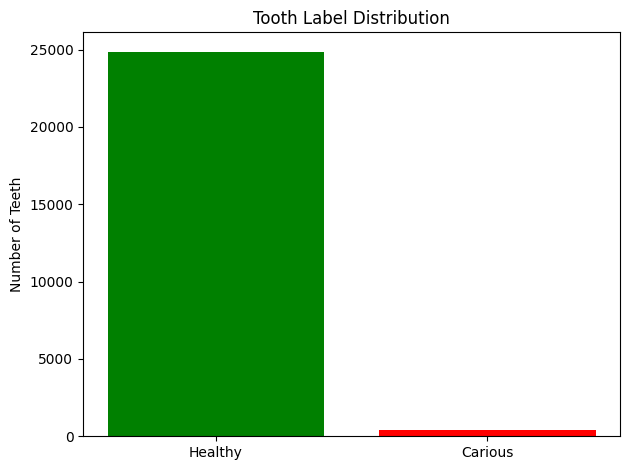

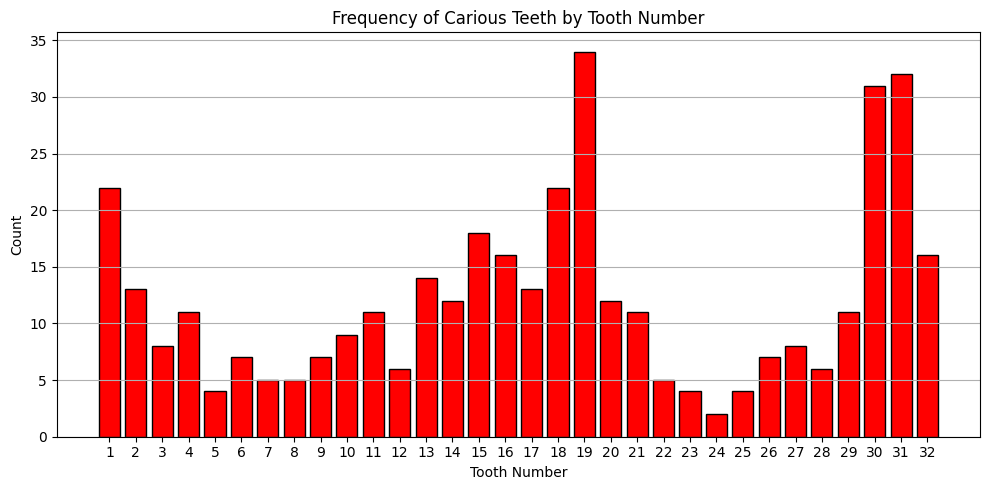

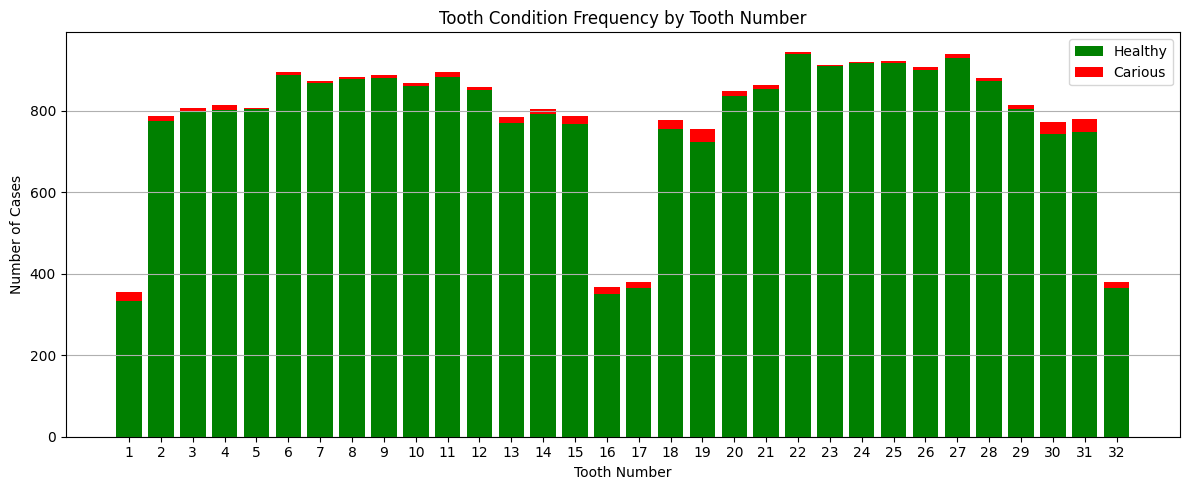

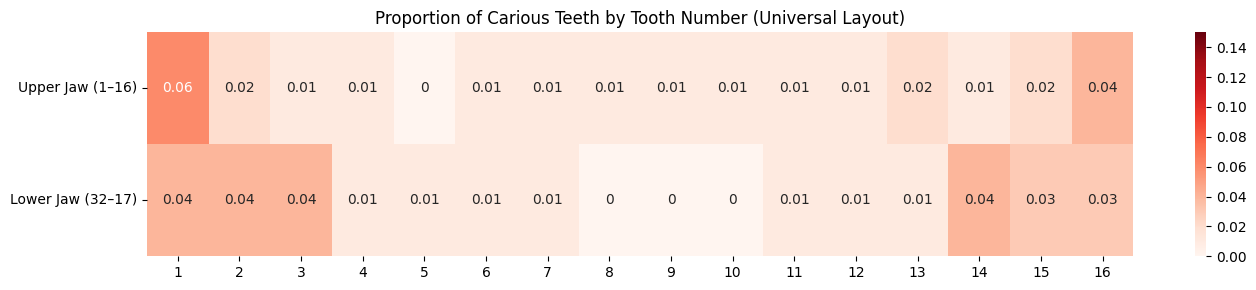

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter

csv_path = r"C:\Users\shawn\Downloads\SMART\tooth_labels_updated.csv"
df = pd.read_csv(csv_path)

#Bar Plot: Total Label Counts
label_counts = df['Label'].value_counts().sort_index()
labels = ['Healthy', 'Carious']
counts = [label_counts.get(0, 0), label_counts.get(1, 0)]

plt.bar(labels, counts, color=["green", "red"])
plt.title("Tooth Label Distribution")
plt.ylabel("Number of Teeth")
plt.tight_layout()
plt.show()

#  Bar Plot: Frequency of Carious Teeth by Tooth Number
carious_teeth = df[df['Label'] == 1]['Tooth#'].tolist()
caries_count = Counter(carious_teeth)
tooth_nums = list(range(1, 33))
caries_vals = [caries_count.get(t, 0) for t in tooth_nums]

plt.figure(figsize=(10, 5))
plt.bar(tooth_nums, caries_vals, color='red', edgecolor='black')
plt.title("Frequency of Carious Teeth by Tooth Number")
plt.xlabel("Tooth Number")
plt.ylabel("Count")
plt.xticks(tooth_nums)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Stacked Bar Chart: Healthy + Carious by Tooth Number
healthy_teeth = df[df['Label'] == 0]['Tooth#'].tolist()
healthy_count = Counter(healthy_teeth)
healthy_vals = [healthy_count.get(t, 0) for t in tooth_nums]

plt.figure(figsize=(12, 5))
plt.bar(tooth_nums, healthy_vals, label="Healthy", color="green")
plt.bar(tooth_nums, caries_vals, bottom=healthy_vals, label="Carious", color="red")
plt.title("Tooth Condition Frequency by Tooth Number")
plt.xlabel("Tooth Number")
plt.ylabel("Number of Cases")
plt.xticks(tooth_nums)
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Heatmap: Proportion of Carious Teeth by Tooth Number 
# Calculate proportion of caries for each tooth # of caries teeth for tooth_x/ total of tooth_x
tooth_props = {}
for t in tooth_nums:
    total = healthy_count.get(t, 0) + caries_count.get(t, 0)
    prop = caries_count.get(t, 0) / total if total > 0 else np.nan
    tooth_props[t] = round(prop, 2)

# Reshape for dental layout (top: 1–16, bottom: 32–17)
heatmap_matrix_reordered = np.array([
    [tooth_props.get(i, np.nan) for i in range(1, 17)],
    [tooth_props.get(i, np.nan) for i in range(32, 16, -1)]
])

plt.figure(figsize=(14, 3))
sns.heatmap(
    heatmap_matrix_reordered,
    annot=True,
    cmap="Reds",
    vmin=0,
    vmax=0.15,
    xticklabels=list(range(1, 17)),
    yticklabels=["Upper Jaw (1–16)", "Lower Jaw (32–17)"]
)
plt.title("Proportion of Carious Teeth by Tooth Number (Universal Layout)")
plt.tight_layout()
plt.show()
